In [1]:
import string
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import gensim 

from sklearn.decomposition import PCA
from gensim.models import FastText as FT_gensim
from gensim.test.utils import datapath
from gensim.models.wrappers import FastText as FT

%matplotlib inline
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\egapa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_excel("../pemilu.xlsx")
df

,id_pembuat,id_status,nama_pembuat,teks_status,gambar_status,url_komentar,waktu_status,id_komentar,id_user_komen,komentar,waktu_komen,label
0,23383061178,23383061178_10152076252911179,Bang Nafie,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076253441179,794948677210695,Oke pak boss!!,2014-06-05 03:55:15,positif
1,23383061178,23383061178_10152076252911179,Sumy Kakasyi Suhaimy,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076253906179,355122887988412,Jangan dusta,2014-06-05 03:55:29,negatif
2,23383061178,23383061178_10152076252911179,Roberto Red,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076253996179,297825977080553,PROBOWO is the WINNER of PEMILU 2014,2014-06-05 03:55:32,positif
3,23383061178,23383061178_10152076252911179,Sugiarman Arman,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076254066179,298708870333739,ilmu padi,2014-06-05 03:55:35,netral
4,23383061178,23383061178_10152076252911179,Rio Corps Taruna,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076254216179,1523715244533780,Hidup Pak Prabowo ..,2014-06-05 03:55:42,positif
...,...,...,...,...,...,...,...,...,...,...,...,...
3359,249750628565406,249750628565406_276917339182068,Anita Rizkia,"Dukungan anda semua adalah amanah, dan apapun ...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-07-09 03:19:51,276891429184659_276927652514370,967613349931842,salam 2 jari,2014-07-09 03:25:45,positif
3360,249750628565406,249750628565406_276917339182068,Ari Bin Abu Bakar,"Dukungan anda semua adalah amanah, dan apapun ...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-07-09 03:19:51,276891429184659_276918865848582,773356856051191,"Jujur, ketika Ane membuka Surat Suara tadi, An...",2014-07-09 03:21:40,negatif
3361,249750628565406,249750628565406_276917339182068,Agek James,"Dukungan anda semua adalah amanah, dan apapun ...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-07-09 03:19:51,276891429184659_276921042515031,710343512387954,BAPAK JOKOWI KAMI SEMUA RAKYAT INGIN BAPAK JD ...,2014-07-09 03:24:02,positif
3362,249750628565406,249750628565406_276917339182068,ChairudinDr Humaniora,"Dukungan anda semua adalah amanah, dan apapun ...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-07-09 03:19:51,276891429184659_276931322514003,10152763210314600,"Tanda2 alam, pemilu 2day on 9 Juli (9-7= 2) ,...",2014-07-09 03:26:36,positif


In [3]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

df_pos = df_train[df_train['label'] == 'positif']
df_pos_train, df_pos_test = train_test_split(df_pos, test_size=0.9, random_state=1)

df_neg = df_train[df_train['label'] == 'negatif']
df_net = df_train[df_train['label'] == 'netral']

In [4]:
df_net_up = df_net

In [5]:
for a in range(2):
    df_net = df_net.append(df_net_up)

In [6]:
df_UpDownSampling = df_neg.append(df_pos_train)
df_UpDownSampling = df_UpDownSampling.append(df_net)
df_UpDownSampling = df_UpDownSampling.dropna()
df_UpDownSampling

,id_pembuat,id_status,nama_pembuat,teks_status,gambar_status,url_komentar,waktu_status,id_komentar,id_user_komen,komentar,waktu_komen,label
3124,249750628565406,249750628565406_270928309780971,Condro Kirono Kediri,Selfie dulu dengan Pak JK sebelum persiapan de...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-07-05 03:41:20,270924516448017_270932253113910,581805585264815,Kecurangan dalam pilpres pak...ambil tindakan ...,2014-07-05 03:43:45,negatif
1216,23383061178,23383061178_10152151832466179,Basilius Teluma,"Insya Allah, ibu Asmoro. Saya bertekad untuk m...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-07-01 01:56:08,10152151832466179_10152151836306179,328225310711718,"tak jd presiden,cocokx jd hansip,hehehe",2014-07-01 01:58:19,negatif
2528,249750628565406,249750628565406_259717104235425,Sukses Mas Ku Supri,Terima kasih atas doa dan dukunganya. Alhamdul...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-06-23 05:30:13,259717104235425_259717717568697,464571140349716,"Debat Capres disegmen tanya-jawab,\nPrabowo : ...",2014-06-23 05:31:54,negatif
2070,249750628565406,249750628565406_253059884901147,Demisky Hengky,Kemarin saya menyapa para santri di pondok pes...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-06-13 03:25:15,253059561567846_253064271567375,986911401334697,Kami pendukung setia prabowo. Maju truss jendral.,2014-06-13 03:42:35,negatif
1466,23383061178,23383061178_10152169415911179,Fhyea JasmineFairy,"Selamat pagi menjelang siang, ibu Lady Diana W...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-07-06 03:15:06,10152169415911179_10152169446301179,1561779277366840,Catatan debat tadi malam\n1. Masalah impor sap...,2014-07-06 03:22:13,negatif
...,...,...,...,...,...,...,...,...,...,...,...,...
2254,249750628565406,249750628565406_255802404626895,Janz Piliang,"Selamat siang, saudara-saudaraku dan selamat b...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-06-17 05:19:26,255802077960261_255831244624011,936516416363623,Ni kalo jomblo,2014-06-17 05:53:08,netral
63,23383061178,23383061178_10152079089271179,Vendra Nosa,"Sahabat, hari ini saya kembali berkeliling Jaw...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-06 11:28:29,10152079082881179_10152079095236179,920854587942188,Ke padang kapan pak..?,2014-06-06 11:31:19,netral
3315,249750628565406,249750628565406_276917339182068,???G? d???????,"Dukungan anda semua adalah amanah, dan apapun ...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-07-09 03:19:51,276891429184659_276917629182039,731104776965641,[[491100850982673]]\n??B-) foto ?? nya ?? itu ...,2014-07-09 03:20:15,netral
15,23383061178,23383061178_10152076252911179,Danny Charles Carter,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076256206179,10201658144535000,Duh gagal pertamax,2014-06-05 03:56:45,netral


In [7]:
import re
import string

nltk.download('punkt')

komentar = df_UpDownSampling['komentar'].astype(str)

#Lower case
komentar = komentar.apply(lambda x: x.lower())

#Remove URL
komentar = komentar.apply(lambda x: re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE))

#Remove Number
komentar = komentar.apply(lambda x: re.sub(r"\d", "", x))

#Before Punctuation
komentar = komentar.apply(lambda x: re.sub(r'(?<=[,.])(?=[^\s])', r' ', x))

#Punctuation
komentar = komentar.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

#Remove Non Alphanumeric
komentar = komentar.apply(lambda x: re.sub(r'([^\s\w]|_)+', '', x))

#Tokenizing
komentar = komentar.apply(lambda x: nltk.tokenize.word_tokenize(x))

komentar

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\egapa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


3124    [kecurangan, dalam, pilpres, pak, ambil, tinda...
1216      [tak, jd, presiden, cocokx, jd, hansip, hehehe]
2528    [debat, capres, disegmen, tanyajawab, prabowo,...
2070    [kami, pendukung, setia, prabowo, maju, truss,...
1466    [catatan, debat, tadi, malam, masalah, impor, ...
                              ...                        
2254                                   [ni, kalo, jomblo]
63                               [ke, padang, kapan, pak]
3315    [b, foto, nya, itu, lho, idola, mbah, ku, joko...
15                                 [duh, gagal, pertamax]
3115                                             [bejori]
Name: komentar, Length: 610, dtype: object

In [8]:
model_gensim = FT_gensim(size=300, 
                         negative=5, 
                         min_count=1, 
                         min_n=2, 
                         max_n=3, 
                         sg=0, 
                         sorted_vocab=1, 
                         word_ngrams=1, 
                         window=5, 
                         callbacks=(),
                         ns_exponent=0.75, 
                         cbow_mean=0, 
                         workers=5, 
                         alpha=0.1, 
                         min_alpha=0.025)

In [9]:
model_gensim.build_vocab(komentar)

In [10]:
total_examples = model_gensim.corpus_count
model_gensim.train(
    sentences=komentar,
    total_examples=total_examples, 
    epochs = 100
)

In [11]:
model_gensim.save('XGBUpDownSampling.bin')
loaded_model = FT_gensim.load('XGBUpDownSampling.bin')

In [12]:
loaded_model.wv.similarity("bagus", "buruk")

0.6996427

In [13]:
loaded_model.wv.distance("bagus", "jelek")

0.3686848282814026

In [14]:
loaded_model.wv.most_similar(positive="jelek", topn=5)

[('menjelek', 0.7955020666122437),
 ('menjelekan', 0.7280521392822266),
 ('menjelekkan', 0.725344717502594),
 ('elek', 0.6874338388442993),
 ('jelaskan', 0.6547728180885315)]

In [15]:
loaded_model.wv.most_similar_cosmul(positive="bagus", negative=None, topn=5)

[('tokobagus', 0.952678918838501),
 ('bc', 0.9262595176696777),
 ('gus', 0.9230632185935974),
 ('ban', 0.9180818200111389),
 ('bs', 0.916225790977478)]

In [16]:
similar_words = {search_term: [item[0] for item in loaded_model.wv.most_similar([search_term], topn=5)]
                for search_term in ['mantap', 'keren', 'bagus', 'jelek', 'parah', 'cepat']}
similar_words

{'mantap': ['mantaf', 'mantaff', 'mantan', 'mantab', 'mantabbbb'],
 'keren': ['kmren', 'kerena', 'green', 'kn', 'wn'],
 'bagus': ['tokobagus', 'bc', 'gus', 'ban', 'bs'],
 'jelek': ['menjelek', 'menjelekan', 'menjelekkan', 'elek', 'jelaskan'],
 'parah': ['para', 'pasrah', 'arah', 'paras', 'pahit'],
 'cepat': ['tepat', 'sepakat', 'ceplos', 'empat', 'cemangat']}

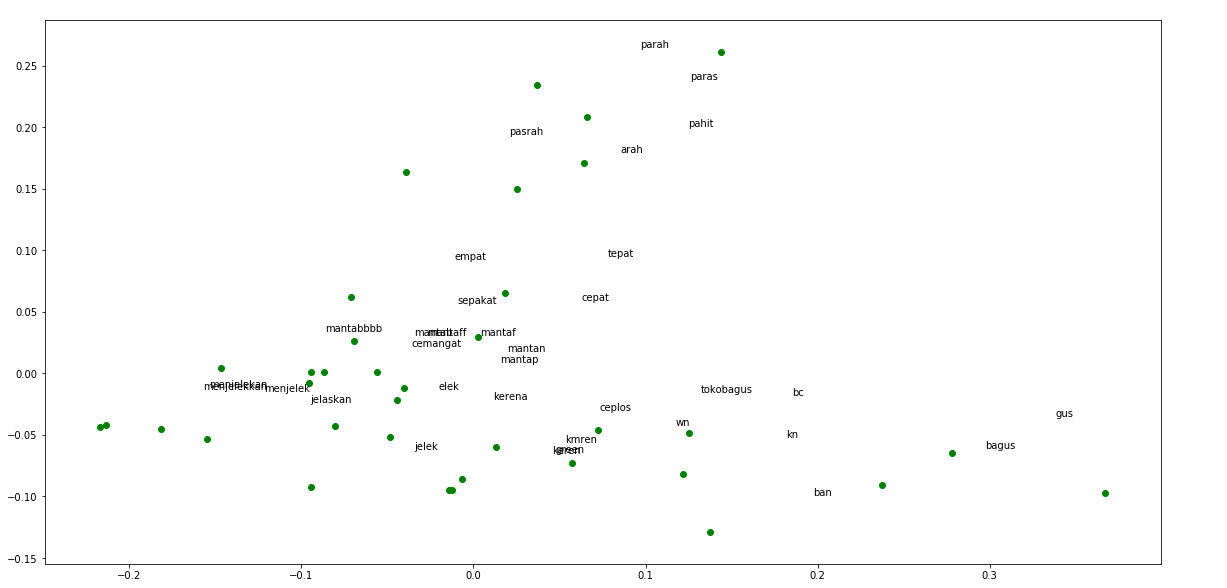

In [17]:
words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = loaded_model.wv[words]

pca = PCA(n_components=2)
np.set_printoptions(suppress=True)
P = pca.fit_transform(wvs)
labels = words

plt.figure(figsize=(20, 10))
plt.scatter(P[:, 0], P[:, 1], c='green', edgecolors='g')
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')